In [1]:
from nltk.probability import FreqDist
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     Hostname mismatch, certificate is not valid for
[nltk_data]     'raw.githubusercontent.com'. (_ssl.c:1056)>


False

In [3]:
import json

with open('../../data/CLEVR_v1-1.0/questions/CLEVR_train_questions.json') as json_file:
    data = json.load(json_file)

In [4]:
df=pd.read_json(json.dumps(data["questions"] ))

In [5]:
df.head()

,answer,image_filename,image_index,program,question,question_family_index,question_index,split
0,yes,CLEVR_train_000000.png,0,"[{'inputs': [], 'function': 'scene', 'value_in...",Are there more big green things than large pur...,2,0,train
1,2,CLEVR_train_000000.png,0,"[{'inputs': [], 'function': 'scene', 'value_in...",How many other things are there of the same sh...,43,1,train
2,no,CLEVR_train_000000.png,0,"[{'inputs': [], 'function': 'scene', 'value_in...",Is the color of the large sphere the same as t...,10,2,train
3,rubber,CLEVR_train_000000.png,0,"[{'inputs': [], 'function': 'scene', 'value_in...",What material is the big object that is right ...,34,3,train
4,large,CLEVR_train_000000.png,0,"[{'inputs': [], 'function': 'scene', 'value_in...",How big is the brown shiny sphere?,89,4,train


### Looking at frequency of apparition of 'as the same' expression

In [6]:
questions = df.question
questions.head()

0    Are there more big green things than large pur...
1    How many other things are there of the same sh...
2    Is the color of the large sphere the same as t...
3    What material is the big object that is right ...
4                   How big is the brown shiny sphere?
Name: question, dtype: object

In [6]:
sub_questions_3 = questions[questions.str.contains('as the')]
len(sub_questions_3) / len(questions)

0.4546185725775691

In [7]:
sub_questions_4 = questions[questions.str.contains('the same')]
len(sub_questions_4) / len(questions)

0.5090551422950932

In [8]:
sub_questions = questions[questions.str.contains('as the same')]

In [9]:
len(sub_questions)

17361

In [10]:
sub_questions_2 = questions[questions.str.contains('as the same as')]

In [11]:
len(sub_questions_2)

0

### Stats on the Questions Dataset.

In [12]:
token=word_tokenize(" ".join(df.question))

In [13]:
fdist = FreqDist(token)

In [14]:
fdist

FreqDist({'the': 1800250, 'of': 751361, 'is': 748423, '?': 699058, 'that': 410029, 'same': 356333, 'thing': 338961, 'object': 328165, 'as': 319520, 'cylinder': 227196, ...})

In [15]:
fdist1 = fdist.most_common(30)
#fdist1

In [16]:
fdist1_dict={ key:value for key,value in fdist1}

<BarContainer object of 30 artists>

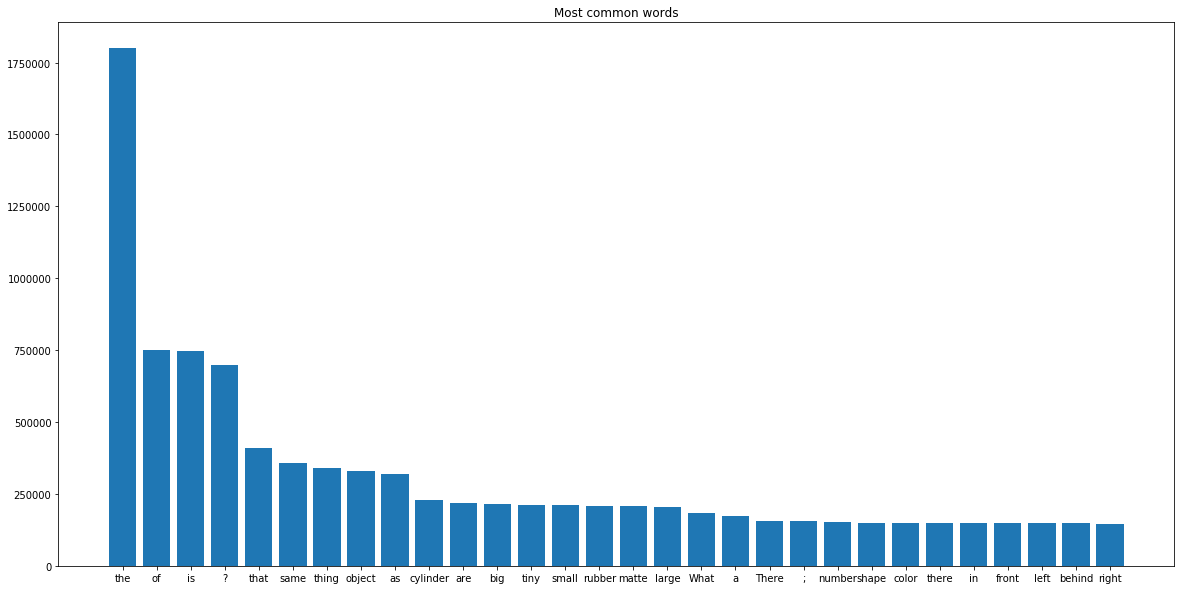

In [17]:
plt.figure(figsize=(20,10))
plt.title("Most common words")
plt.bar(fdist1_dict.keys(), fdist1_dict.values())

In [18]:
len_func=lambda t : len(word_tokenize(t))

In [ ]:
len_questions=df.question.apply(len_func)

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Question size distribution")
len_questions.plot.hist(bins=30 )

### Images with questions length <=15. 

In [13]:
token=word_tokenize(" ".join(df.answer))

In [14]:
fdist = FreqDist(token)

In [16]:
fdist1 = fdist.most_common(30)
fdist1_dict={ key:value for key,value in fdist1}


<BarContainer object of 28 artists>

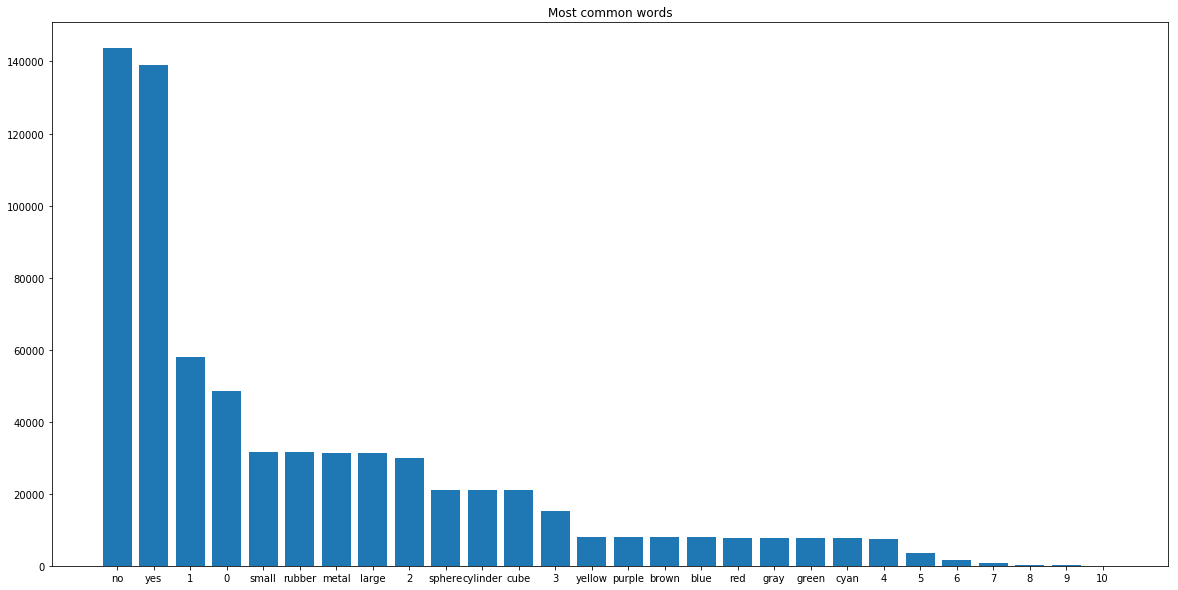

In [17]:
plt.figure(figsize=(20,10))
plt.title("Most common words")
plt.bar(fdist1_dict.keys(), fdist1_dict.values())

In [ ]:
df[:110].groupby("image_index").mean()

In [21]:
f=lambda x: token=word_tokenize(" ".join(df.answer))